<a href="https://colab.research.google.com/github/KaueAbbe/Case_Fraude/blob/main/Tramento_Dados/Fraude_tratamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 7 color = 'green'> Caso de Fraude - Tratamento de Dados</font>


##**Objetivo do Case**
Neste case atuarei como analista e cientista de dados, adquirindo e gerando informações sobre casos de compras fradulentas.

Como analista e cientista de dados dessa empresa passarei por todo processo de limpeza dos dados, análise exploratória e criação de um modelo de Machine Leaning para classificar possíveis compras como fraudes. O objetivo da empresa é compreender as fraudes, adquirir informações valiosas sobre e classificar compras como fraudulentas ou não.

##**Objetivos Tratamento de Dados**
1. Realizar tratamento de Valores Nulos
2. Construir coluna informando se era dado nulo
3. Verificar outliers com erros de informação.
4. Realizar renomeação de dados errados
5. Salvar dados para EDA e Criação do Modelo

<font size = 6 color = 'Blue'> Tratamento dos Dados</font>

# Ler os dados e analisar informações básicas
## Sobre os dados
1. Os dados foram unanimizados e distribuidos a fim de profissionalização de cientistas e analistas de dados.
2. Eles poderão ser encontrados no repositório do GitHub


* Para resolvê-lo, precisarei fazer algumas suposições. Justifique toda suposição que fizer

* Sabemos que a empresa ganha 10% do valor de um pagamento aprovado corretamente e a cada fraude aprovada perdemos 100% do valor do pagamento.

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/Python/Case/Dados_Case1.csv')
df = dados.copy()
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

* 150000 Linhas com 20 colunas.
* Existem dados Nulos

**Dicionário**

* score_1 a score_10: São notas de bureau de crédito que a empresa adquiriu para identificar se o comprador é confiável ou outros dados anonimizados que não temos informação sobre

* País: pais de compra

* Produto: produto que está sendo comprado no e-commerce

* Categoria_produto: categoria a qual esse produto se encaixa

* Entrega_doc_1 a entrega_doc_3: Documentos requisitados no momento de fazer a conta. 0 = N = nao entregou. Y = 1 = entregou. Se vazio, considere que nao entregou

* Score_fraude_modelo: score dado pelo modelo atual. É a probabilidade daquela compra ser uma fraude ou nao. Quanto mais próximo de 100, maior a certeza do modelo que é fraude

* Fraude: informacao se aquela compra era fraudulenta ou nao. Foi inserida após alguns dias, para termos o feedback real se de fato era fraudulenta ou nao. 0 se nao era fraudulenta e 1 se era fraudulenta

In [ ]:
df.describe()

,score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9,score_10,entrega_doc_1,valor_compra,score_fraude_modelo,fraude
count,150000.000000,137016.000000,1.370160e+05,149635.000000,150000.000000,149989.000000,150000.000000,150000.000000,149989.000000,149635.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,3.705407,0.728115,2.604451e+05,21.677669,0.220641,51.169352,14.193513,0.497532,2305.409403,299.969579,0.902353,43.523134,48.066240,0.050000
std,0.753206,0.132943,8.464361e+05,20.062146,2.434995,709.472904,14.161216,0.288348,1712.379601,321.075806,0.296837,91.557888,28.995122,0.217946
min,1.000000,0.000000,1.600000e-01,0.000000,0.000000,-5.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000
25%,4.000000,0.678400,9.679915e+03,2.000000,0.000000,1.000000,3.000000,0.246819,910.000000,42.000000,1.000000,9.380000,23.000000,0.000000
50%,4.000000,0.755500,4.371165e+04,14.000000,0.104875,8.000000,9.000000,0.495990,1937.000000,193.000000,1.000000,20.610000,48.000000,0.000000
75%,4.000000,0.806500,1.454436e+05,50.000000,0.282938,33.000000,21.000000,0.746508,3445.000000,459.000000,1.000000,40.692500,73.000000,0.000000
max,4.000000,1.000000,1.387874e+07,50.000000,833.333333,145274.000000,58.000000,0.999995,7544.000000,2225.000000,1.000000,3696.350000,100.000000,1.000000


* Parece não ter muita distribuição normal nos scores
* Parece haver muitos outliers nos scores

# Analisando Dados Faltantes
## Scores

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

In [ ]:
df[df['score_2'].isnull()]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
16,2,NaN,NaN,1.0,0.000000,1.0,BR,0,Chaveiro Lindo Do Thor,cat_d9753d4,0.879664,1233.0,0.0,0,NaN,N,2020-03-28 17:09:53,5.46,91,1
21,4,NaN,NaN,11.0,0.000000,4.0,BR,42,Réplica Cédulas De Réis - Todas 71 Cédulas Da ...,cat_ef93322,0.523362,2576.0,276.0,1,NaN,Y,2020-03-13 12:52:00,54.10,58,0
40,4,NaN,NaN,2.0,0.000000,43.0,BR,30,Zombicide Black Plague Board Game Em Português...,cat_6f55b11,0.440419,4827.0,66.0,1,Y,N,2020-03-11 22:54:13,106.92,11,0
42,4,NaN,NaN,50.0,0.117800,219.0,BR,2,Vintage Macbook Pro Mid 2009,cat_e5ca240,0.204651,4006.0,783.0,1,NaN,Y,2020-03-12 9:48:37,110.48,8,0
57,4,NaN,NaN,10.0,0.000000,1.0,BR,29,Calculadora Cientifica 240 Funções + Capa 82ms,cat_8b92772,0.906483,3664.0,211.0,1,Y,Y,2020-03-12 8:14:34,29.61,67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149978,4,NaN,NaN,28.0,0.000000,7.0,BR,13,Bíblia Do Expositor De Estudo Vinho + Harpa De...,cat_8ef7164,0.530376,1982.0,207.0,1,NaN,Y,2020-03-12 11:31:13,32.04,16,0
149980,4,NaN,NaN,1.0,0.234211,0.0,BR,24,Escudo Protetor Para Falante Jbl Tornado 4600 ...,cat_5c068ea,0.266734,0.0,0.0,0,N,N,2020-03-09 12:20:37,8.45,89,0
149993,4,NaN,NaN,7.0,0.000000,10.0,AR,13,6cajas Organizadoras Grandes +1set De Chica Me...,cat_12f90c6,0.144373,4029.0,73.0,1,NaN,N,2020-03-10 5:41:18,48.17,69,0
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,0.989981,499.0,135.0,1,NaN,Y,2020-03-11 20:21:35,9.69,0,0


* Bureais de crédito são valores que informam quão provável é de uma pessoa conseguir um crédio com uma instituição. Quanto mais próxima 1 maior é a probalividade.

* Neste sentido: Os valores faltantes de um cliente indica que a empresa não tem informação sobre esse bureal do cliente, assim não se pode ter quão bom pagador é este cliente. Por este motivo vamos substituir o NaN dos bureais por 0, já que nenhuma empresa vai arriscar dar créditos sem informações concretas.

* No entanto, é interessante fazer análise de missings para verificar se há ou não diferença quanto a variável target. Então vou criar uma coluna que representa como 0 não ser missing e como 1 ser missing.

## Criando Colunas Variável_Missing

In [ ]:
colunas_miss = []
for i in df.columns:
  if sum(df.isna()[i]) != 0 : colunas_miss.append(i)
colunas_miss

['score_2',
 'score_3',
 'score_4',
 'score_6',
 'pais',
 'score_9',
 'score_10',
 'entrega_doc_2']

In [ ]:
for i in colunas_miss:
  lista = [1 if pd.isna(valor) else 0 for valor in df[i]]
  df[i + '_faltante'] = lista

df.tail()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_fraude_modelo,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante
149995,4,0.8191,21393.63,7.0,0.000000,1.0,BR,4,Aparelho Lipocavitação Ultrassônico + Gel Cond...,cat_a5b2091,...,95,0,0,0,0,0,0,0,0,1
149996,4,NaN,NaN,24.0,0.384615,11.0,UY,20,"Sellos De Goma Automaticos, Personalizados.",cat_e39ab7e,...,0,0,1,1,0,0,0,0,0,1
149997,4,NaN,NaN,3.0,0.477778,1.0,BR,19,Hélice 3 Pás Alumínio Rabeta 6.5 Hp Pesca Barc...,cat_ee6ecc8,...,15,0,1,1,0,0,0,0,0,1
149998,4,0.6067,152906.86,1.0,0.099175,133.0,BR,3,Tela Display Lcd Galaxy J7 Neo J701 Com Brilho...,cat_237e2d0,...,59,0,0,0,0,0,0,0,0,1
149999,4,0.7546,7924.69,1.0,0.477778,80.0,BR,4,A Magia Divina Das Velas. O Livro Das Sete Cha...,cat_8ef7164,...,35,0,0,0,0,0,0,0,0,1


## trocando valores Nan por Outros valores

Abaixo substituirei os valores Nan.
* Faço isto pois os modelos de aprendizagem não funcionam bem com dados faltantes.
* Para features quantitativas farei a substituição pela mediana.
* Para features qualitativas farei a substituição pelo mais frequente.

In [ ]:
# Variáveis scores são variáveis quantitativas
for i in ['score_' + str(x) for x in range(1, 11)]:
  df[i] = df[i].fillna(df[i].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_1                 150000 non-null  int64  
 1   score_2                 150000 non-null  float64
 2   score_3                 150000 non-null  float64
 3   score_4                 150000 non-null  float64
 4   score_5                 150000 non-null  float64
 5   score_6                 150000 non-null  float64
 6   pais                    149806 non-null  object 
 7   score_7                 150000 non-null  int64  
 8   produto                 150000 non-null  object 
 9   categoria_produto       150000 non-null  object 
 10  score_8                 150000 non-null  float64
 11  score_9                 150000 non-null  float64
 12  score_10                150000 non-null  float64
 13  entrega_doc_1           150000 non-null  int64  
 14  entrega_doc_2       

## Documentos


In [ ]:
df[df['entrega_doc_2'].isna()].head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_fraude_modelo,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,...,66,0,0,0,0,0,0,0,0,1
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,...,95,0,0,0,0,0,0,0,0,1
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,...,2,0,0,0,0,0,0,0,0,1
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,...,76,0,0,0,0,0,0,0,0,1
5,4,0.7359,42727.15,50.0,0.000000,47.0,BR,1,Kit Gamer Teclado Hedfone Mouse E Mousepad,cat_9d78e2e,...,32,0,0,0,0,0,0,0,0,1


* Como não a empresa não tem informação do documento da pessoa vou preecher o documento faltante como não entregou documento. NaN -> 0(não)

In [ ]:
df['entrega_doc_2'] = df['entrega_doc_2'].fillna(0)
sum(df['entrega_doc_2'].isna())

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_1                 150000 non-null  int64  
 1   score_2                 150000 non-null  float64
 2   score_3                 150000 non-null  float64
 3   score_4                 150000 non-null  float64
 4   score_5                 150000 non-null  float64
 5   score_6                 150000 non-null  float64
 6   pais                    149806 non-null  object 
 7   score_7                 150000 non-null  int64  
 8   produto                 150000 non-null  object 
 9   categoria_produto       150000 non-null  object 
 10  score_8                 150000 non-null  float64
 11  score_9                 150000 non-null  float64
 12  score_10                150000 non-null  float64
 13  entrega_doc_1           150000 non-null  int64  
 14  entrega_doc_2       

## Países

In [ ]:
df[df['pais'].isna()]

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,...,score_fraude_modelo,fraude,score_2_faltante,score_3_faltante,score_4_faltante,score_6_faltante,pais_faltante,score_9_faltante,score_10_faltante,entrega_doc_2_faltante
202,4,0.9656,2463.620,2.0,0.165028,16.0,NaN,1,Máscara Descartável Tnt Tripla C/ 20 Unid. Env...,cat_604df77,...,47,0,0,0,0,0,1,0,0,1
1046,2,0.7555,43711.655,15.0,0.000000,0.0,NaN,0,Skin Atheris Csgo Ww Com Etiqueta De Nome E Ad...,cat_1b32044,...,94,1,1,1,0,0,1,0,0,0
1188,4,0.8524,21084.510,1.0,0.000000,24.0,NaN,0,Mascara N95 Não Descartável Pff2 Pff3 Risco Bi...,cat_72781ea,...,6,0,0,0,0,0,1,0,0,1
2508,4,0.7828,32363.910,1.0,0.347708,0.0,NaN,37,Aquecedor Lavatório Cabeleireiro Wm 110v + Man...,cat_d2ed8af,...,76,0,0,0,0,0,1,0,0,1
3031,4,0.7399,29406.650,1.0,0.603030,2.0,NaN,27,Cd Laura Pausini - La Mia Risposta,cat_12a8b9b,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148268,4,0.5580,48567.700,50.0,1.055226,33.0,NaN,0,Mascara Proteccion Facial Transparente Barbijo...,cat_e600e6d,...,60,0,0,0,0,0,1,0,0,1
148305,4,0.7154,176738.200,50.0,0.163934,35.0,NaN,2,Smartband M3 Pulseira Inteligente Monitor Card...,cat_1fec493,...,71,0,0,0,0,0,1,0,0,0
148719,4,0.8173,107273.830,11.0,0.000000,184.0,NaN,23,Disco De Freio Cg Titan Fan 150 2009/2016 Fan ...,cat_256e2f2,...,49,0,0,0,0,0,1,0,0,1
149265,4,0.6265,97457.690,1.0,0.000000,20.0,NaN,8,Bordeadora Eléctrica Plumita 1000w + Regalos -...,cat_555e8c0,...,93,0,0,0,0,0,1,0,0,1


In [ ]:
df['pais'].value_counts(normalize = True)

BR    0.745150
AR    0.213369
UY    0.019806
US    0.015173
SE    0.002390
MX    0.001575
RU    0.000487
ES    0.000461
CO    0.000427
GB    0.000287
FR    0.000120
IT    0.000093
PT    0.000087
DE    0.000060
CL    0.000060
PE    0.000033
EC    0.000027
PY    0.000027
AU    0.000020
PA    0.000020
CA    0.000020
UA    0.000020
BE    0.000020
CN    0.000020
CH    0.000020
NZ    0.000020
PR    0.000013
NL    0.000013
BO    0.000013
CR    0.000013
AE    0.000013
LB    0.000013
FI    0.000007
TW    0.000007
NO    0.000007
EG    0.000007
IL    0.000007
PH    0.000007
JP    0.000007
GH    0.000007
NI    0.000007
DO    0.000007
BS    0.000007
TR    0.000007
IN    0.000007
GR    0.000007
HN    0.000007
KR    0.000007
GE    0.000007
AD    0.000007
ZA    0.000007
Name: pais, dtype: float64

* Não é possível adivinha o país em questão.
* Existem 194 dados (1% dos dados)

In [ ]:
df['pais'] = df['pais'].fillna('BR')
sum(df['entrega_doc_2'].isna())

0

In [ ]:
df.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_1                 150000 non-null  int64  
 1   score_2                 150000 non-null  float64
 2   score_3                 150000 non-null  float64
 3   score_4                 150000 non-null  float64
 4   score_5                 150000 non-null  float64
 5   score_6                 150000 non-null  float64
 6   pais                    150000 non-null  object 
 7   score_7                 150000 non-null  int64  
 8   produto                 150000 non-null  object 
 9   categoria_produto       150000 non-null  object 
 10  score_8                 150000 non-null  float64
 11  score_9                 150000 non-null  float64
 12  score_10                150000 non-null  float64
 13  entrega_doc_1           150000 non-null  int64  
 14  entrega_doc_2       

* Temos agora um dataset com: 149806 linhas e 20 colunas.
* Não possui valor NaN
* Não possui valores duplicados

# Tradução dos valores

In [ ]:
df.head(10)['entrega_doc_2']

0    0
1    Y
2    0
3    0
4    0
5    0
6    0
7    0
8    Y
9    0
Name: entrega_doc_2, dtype: object

1. A entrega dos documentos estão com 1, 0, Y e N. Vamos alterar apenas 1 e 0. E alterar para tipo numérico.

In [ ]:
df = df.replace({'Y':1, 'N': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   score_1                 150000 non-null  int64  
 1   score_2                 150000 non-null  float64
 2   score_3                 150000 non-null  float64
 3   score_4                 150000 non-null  float64
 4   score_5                 150000 non-null  float64
 5   score_6                 150000 non-null  float64
 6   pais                    150000 non-null  object 
 7   score_7                 150000 non-null  int64  
 8   produto                 150000 non-null  object 
 9   categoria_produto       150000 non-null  object 
 10  score_8                 150000 non-null  float64
 11  score_9                 150000 non-null  float64
 12  score_10                150000 non-null  float64
 13  entrega_doc_1           150000 non-null  int64  
 14  entrega_doc_2       

# Outliers

<Axes: >

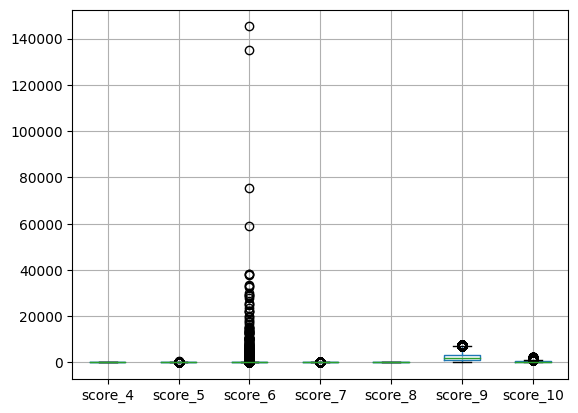

In [ ]:
df[['score_' + str(x) for x in range(4, 11, 1)]].boxplot()

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifique os outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

<ipython-input-44-56e0b46054b2>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-44-56e0b46054b2>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-44-56e0b46054b2>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))


<Axes: >

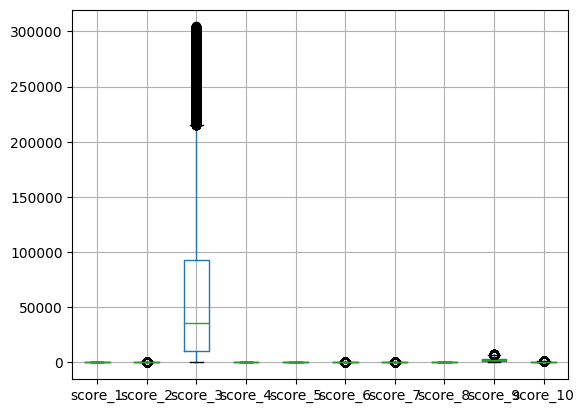

In [ ]:
# Remova os outliers
data_no_outliers = df[~outliers.any(axis=1)]
data_no_outliers[['score_' + str(x) for x in range(1, 11, 1)]].boxplot()

In [ ]:
data_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51098 entries, 0 to 149999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   score_1                 51098 non-null  int64  
 1   score_2                 51098 non-null  float64
 2   score_3                 51098 non-null  float64
 3   score_4                 51098 non-null  float64
 4   score_5                 51098 non-null  float64
 5   score_6                 51098 non-null  float64
 6   pais                    51098 non-null  object 
 7   score_7                 51098 non-null  int64  
 8   produto                 51098 non-null  object 
 9   categoria_produto       51098 non-null  object 
 10  score_8                 51098 non-null  float64
 11  score_9                 51098 non-null  float64
 12  score_10                51098 non-null  float64
 13  entrega_doc_1           51098 non-null  int64  
 14  entrega_doc_2           51098 non-nul

* A retirada dos valores Outliers resultaram em perda de cerca de 2/3 do dataset original. Ou seja, a maioria dos dados são outliers, e por este motivo vou manter os outliers no dataset.

# Pequeno estudo das features produto e categoria_produto

In [ ]:
len(df['produto'].unique())

127804

In [ ]:
len(df['categoria_produto'].unique())

8324

# Salvar os Dados
* Os dados salvos serão utilizados no Análise Exploratória e na Criação do Modelo de Machine Learning

In [ ]:
df.to_csv('/content/drive/MyDrive/Python/Case/Dados_Case1_tratados.csv', index = False)